<a href="https://colab.research.google.com/github/YebinK/Coursera-Deep-Learning-Assignment/blob/master/multiclass_classification_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **미래연구소 9기 Assignment**
 


In [0]:
# 1. data 업로드
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

3


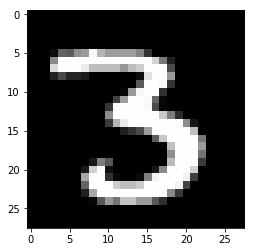

In [27]:
# 2. data 확인
import matplotlib.pyplot as plt
%matplotlib inline

index = 12
img = x_train[index]
print(y_train[index])
plt.imshow(img,cmap='gray')

In [28]:
# 3. data pre-processing 데이터 전처리 과정
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### START CODE HERE ###
# image normalization(혹은 standardization)은 어떤 값으로 나누어야 할까요?
x_train /= 255
x_test /= 255
### END CODE HERE ###

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
#input_shape = (28,28,1)

x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

In [0]:
# dataset 분할. 원래 train set에 60000개인데
#from sklearn.model_selection import train_test_split #아래 함수를 쓰면
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1667) #validation set에 10000개, train set에 50000개로 쪼개줌.

In [0]:
# 4. 모델 구성하기
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import layers
from keras import optimizers

### START CODE HERE ###
# 모델을 담는 그릇과 같은 함수를 빈칸에 적어주세요. hint는 위의 import된 함수 중 하나입니다.
# 수업시간에 설명한 대로 hidden layer와 output layer의 activation을 설정해주세요.
model = Sequential() #Sequential로 객체 생성. 객체 이름 model
model.add(Dense(units=64, input_dim=28*28, activation='relu')) #First hidden layer. input_dim : input feature 개수
model.add(Dense(units=10, activation='softmax')) #Output layer. units는 출력 층 개수. 0~9 이므로 10. hyperparameter 아님!
### END CODE HERE ###

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 5. 모델 학습과정 설정
### START CODE HERE ###
# optimizer는 sgd를 사용하고 metric은 accuracy로 설정해주세요.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
### END CODE HERE ###
'''
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(lr=0.01,),
              metrics=['accuracy'])
'''

"\nmodel.compile(loss=keras.losses.categorical_crossentropy, \n              optimizer=keras.optimizers.Adam(lr=0.01,),\n              metrics=['accuracy'])\n"

In [34]:
# 6. 모델 학습
### START CODE HERE ###
# train set과 validation set을 각각 50000개, 10000개로 분할해주세요.(keras fit 함수를 검색해서 나오는 인자 값 중 하나를 쓰시면 됩니다.)
history = model.fit(x_train, y_train, validation_split=0.166666, epochs=5, batch_size=32)
### END CODE HERE ###

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 6s 126us/step - loss: 0.7091 - acc: 0.8228 - val_loss: 0.3739 - val_acc: 0.9022
Epoch 2/5
50000/50000 [==============================] - 6s 122us/step - loss: 0.3643 - acc: 0.8992 - val_loss: 0.3061 - val_acc: 0.9155
Epoch 3/5
50000/50000 [==============================] - 6s 123us/step - loss: 0.3161 - acc: 0.9113 - val_loss: 0.2783 - val_acc: 0.9225
Epoch 4/5
50000/50000 [==============================] - 6s 122us/step - loss: 0.2888 - acc: 0.9194 - val_loss: 0.2598 - val_acc: 0.9282
Epoch 5/5
50000/50000 [==============================] - 6s 124us/step - loss: 0.2688 - acc: 0.9252 - val_loss: 0.2463 - val_acc: 0.9329


<function matplotlib.pyplot.show>

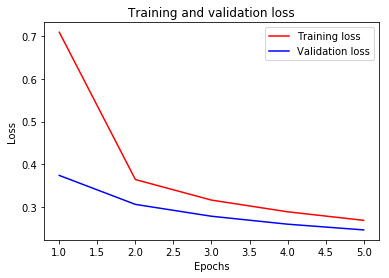

In [35]:
# 7. 학습과정 graph(loss) 이걸로 내가 작성한 compile, fit함수가 맞는지 확인할 수 있다.
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show

<function matplotlib.pyplot.show>

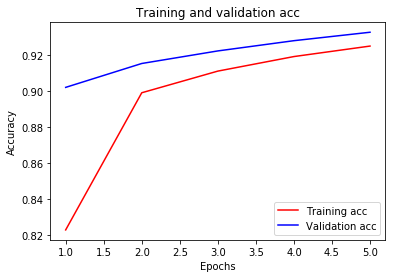

In [36]:
# 7. 학습과정 graph(accuracy)
plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

### START CODE HERE ###
# 글씨 색, 레이블, 제목 등을 변경해보세요(bo 대신 ro를 쓰면 빨간 점이 찍힙니다)
plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
### END CODE HERE ###

plt.show

In [44]:
# 8. 모델 test
### START CODE HERE ###(None을 지우고 model을 evaluate 할 수 있는 함수를 사용해보세요)
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
### END CODE HERE ###
print('## evaluation loss and_metrics ##')
print('test_loss : ' + str(loss_and_metrics[0]))
print('test_acc : ' + str(loss_and_metrics[1] * 100) + '%')

10000/10000 [==============================] - 0s 49us/step
## evaluation loss and_metrics ##
test_loss : 0.25219504376649854
test_acc : 92.84%
